In [15]:
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
# Add src directory to Python path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.config import DATA_DIR, N_CLS
from src.utils.preprocess_data import M, M3, check_predict, stretch_n

In [16]:
def check_predict(id='6120_2_3'):
#     model = get_unet()
#     model.load_weights('/kaggle/working/unet_10_jk%.4f' % score)

#     msk = predict_id(id, model, [0.4, 0.1, 0.4, 0.3, 0.3, 0.5, 0.3, 0.6, 0.1, 0.1])
    m = M(id)
    print(m.shape)
    class_list = ["Buildings", "Misc.Manmade structures" ,"Road",\
                  "Track","Trees","Crops","Waterway","Standing water",\
                  "Vehicle Large","Vehicle Small"]
    
    img = np.zeros((m.shape[0],m.shape[1],3))
    img[:,:,0] = m[:,:,4] #red
    img[:,:,1] = m[:,:,2] #green
    img[:,:,2] = m[:,:,1] #blue
    for i in range(10):
        plt.figure(figsize=(20,20))
        ax1 = plt.subplot(131)
        ax1.set_title('image ID:6120_2_3')
        ax1.imshow(stretch_n(img))
#         ax2 = plt.subplot(132)
#         ax2.set_title("predict "+ class_list[i] +" pixels")
#         ax2.imshow(msk[i], cmap=plt.get_cmap('gray'))
#         ax3 = plt.subplot(133)
#         ax3.set_title("predict " + class_list[i] + " polygones")
#         ax3.imshow(mask_for_polygons(mask_to_polygons(msk[i], epsilon=1), img.shape[:2]), cmap=plt.get_cmap('gray'))
#         plt.show()

## here is the function to actually visualize the data well!!! 
the image has to be stretched from 8 to 3 RGB channels.

(837, 851, 8)


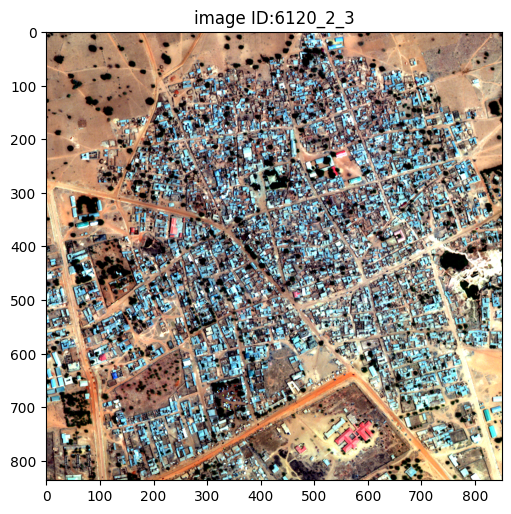

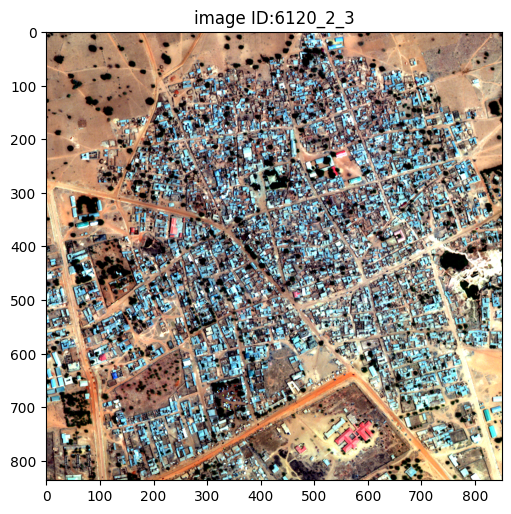

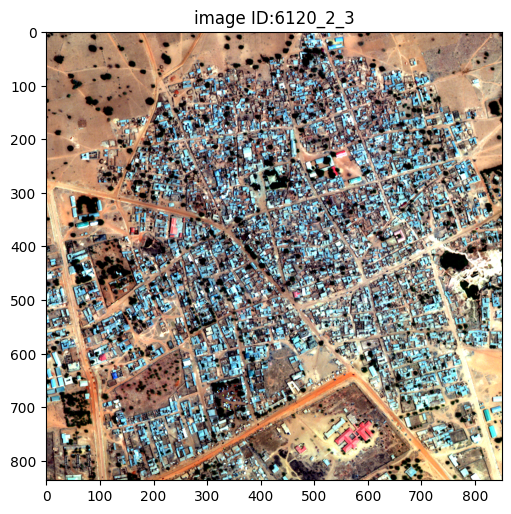

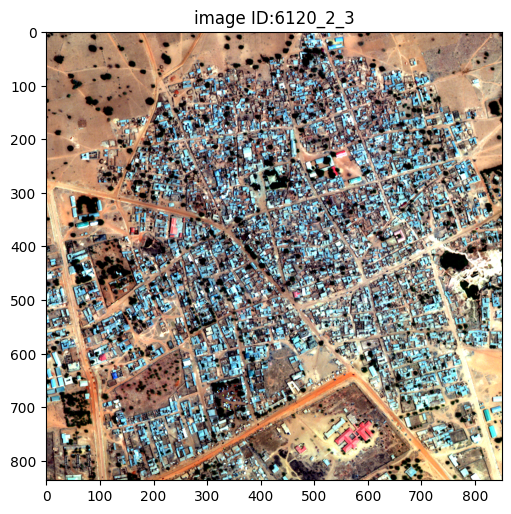

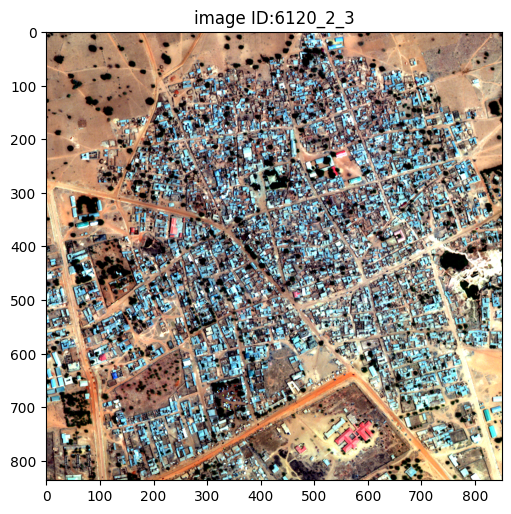

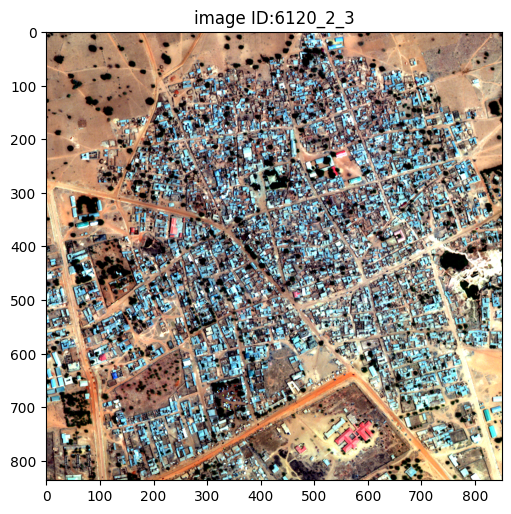

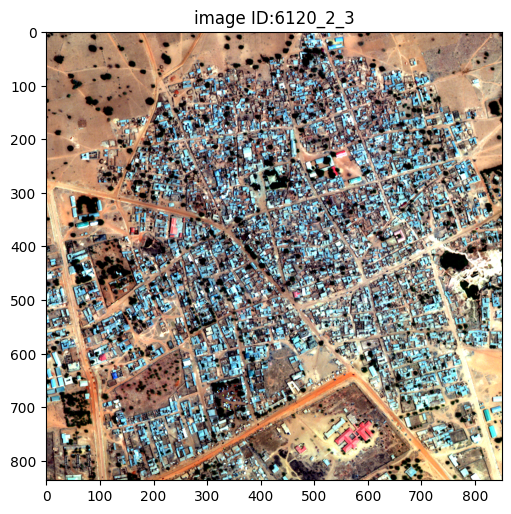

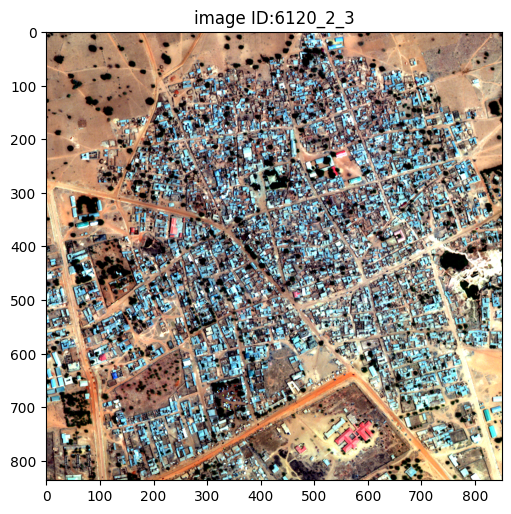

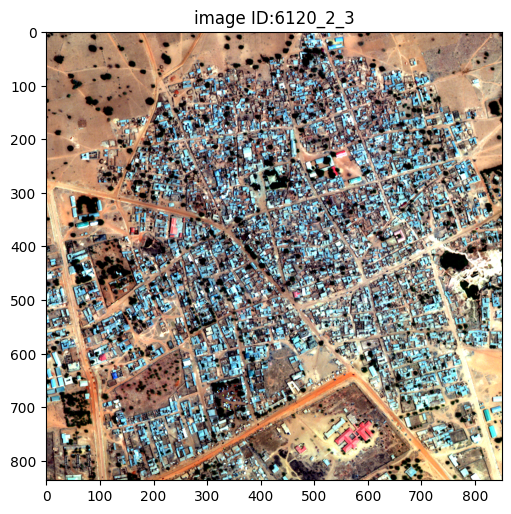

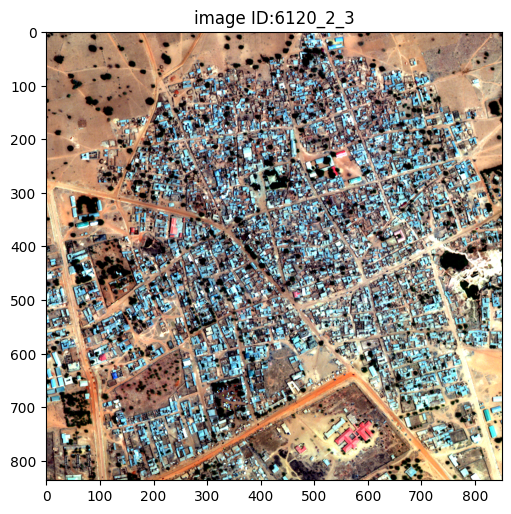

In [17]:
check_predict('6120_2_2')


<class 'numpy.ndarray'>
(3348, 3403, 3)


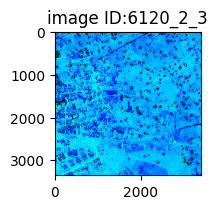

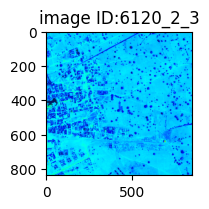

3


In [12]:
try_img = M3("6120_2_3")
print(type(try_img))
print(try_img.shape)
plt.figure()
ax1 = plt.subplot(131)
ax1.set_title('image ID:6120_2_3')
ax1.imshow(try_img[:, :, [0]], cmap=plt.get_cmap('gist_ncar'))
check_predict()
print(try_img.ndim)

['0.npy', '1.npy', '10.npy', '11.npy', '12.npy', '13.npy', '14.npy', '15.npy', '16.npy', '17.npy', '18.npy', '19.npy', '2.npy', '20.npy', '21.npy', '22.npy', '23.npy', '24.npy', '3.npy', '4.npy', '5.npy', '6.npy', '7.npy', '8.npy', '9.npy']
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)
3
(400, 400, 3)


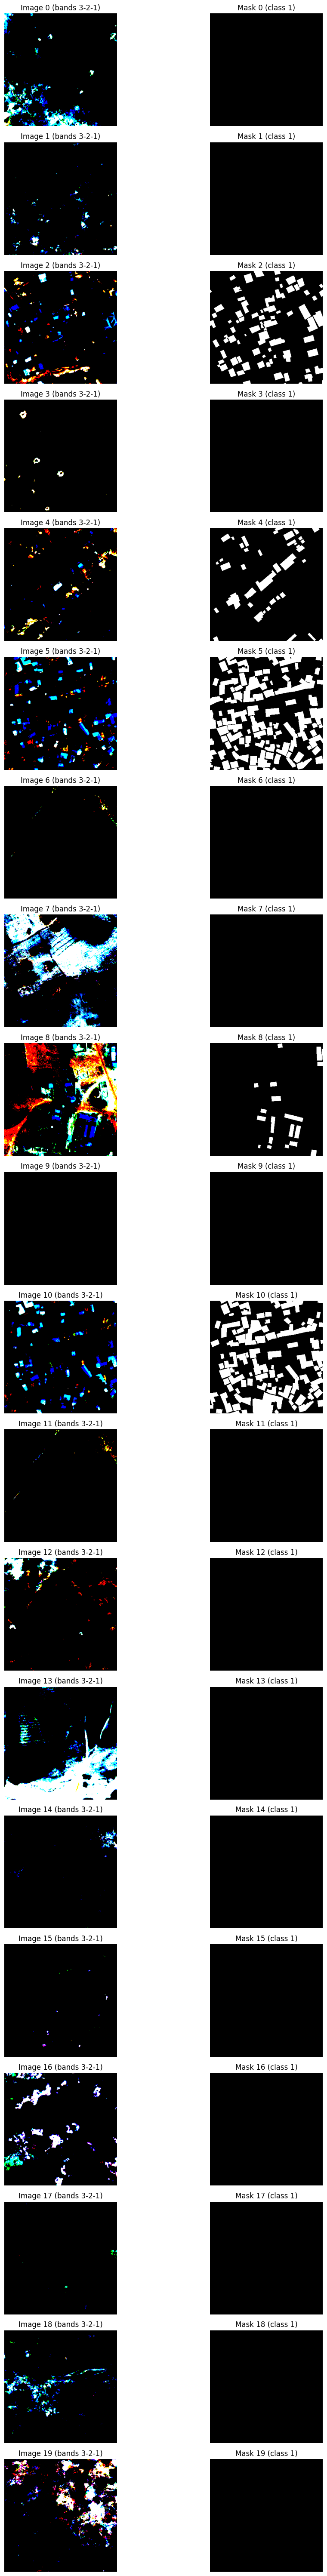

In [9]:
# Directories where your preprocessed images/masks are saved
image_dir = os.path.join(DATA_DIR, "processed/train/images")
mask_dir = os.path.join(DATA_DIR, "processed/train/masks")

# List of file names
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.npy')])
print(image_files)
# Number of samples to visualize
n_samples = 20

# Plot a few samples
plt.figure(figsize=(12, n_samples * 3))
for i in range(n_samples):
    img = np.load(os.path.join(image_dir, image_files[i]))      # shape (H, W, C)
    mask = np.load(os.path.join(mask_dir, image_files[i]))      # shape (H, W, N_CLS)
    # Choose an image channel and a mask class to show
    print(img.ndim)
    print(img.shape)
    img_rgb = img[:, :, :]  # simulate RGB using bands (adjust as needed)
    class_idx = 0                  # choose one class to visualize

    plt.subplot(n_samples, 2, 2 * i + 1)
    plt.imshow(img)

    plt.title(f"Image {i} (bands 3-2-1)")
    plt.axis('off')

    plt.subplot(n_samples, 2, 2 * i + 2)
    plt.imshow(mask[:, :, class_idx], cmap='gray')
    plt.title(f"Mask {i} (class {class_idx + 1})")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(n_samples):
    img = np.load(os.path.join(image_dir, image_files[i]))      # shape (H, W, C)
    mask = np.load(os.path.join(mask_dir, image_files[i]))      # shape (H, W, N_CLS)

    print("Image shape:", img.shape)
    print("Min pixel value:", img.min())
    print("Max pixel value:", img.max())

    # Visualize a single channel and print a zoomed-in region
    channel = 0
    plt.imshow(img[:, :, channel], cmap="gray")
    plt.title(f"Channel {channel}")
    plt.colorbar()
    plt.show()

    # Print pixel values in a 10x10 patch
    print("10x10 pixel values (top-left):")
    print(np.round(img[:10, :10, channel], 3))



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from src.config import DATA_DIR, N_CLS

# Load the full arrays
x_path = os.path.join(DATA_DIR, f"x_trn_{N_CLS}.npy")
y_path = os.path.join(DATA_DIR, f"y_trn_{N_CLS}.npy")

x = np.load(x_path)  # Shape: (N, C, H, W)
y = np.load(y_path)  # Shape: (N, C, H, W)

# Number of samples to visualize
n_samples = 2
class_idx = 0  # Class to visualize

plt.figure(figsize=(12, n_samples * 3))
for i in range(n_samples):
    img = x[i]  # shape (C, H, W)
    mask = y[i]  # shape (C, H, W)
    
    print(img.ndim)
    print(img)
#     # Convert to (H, W, C) for visualization
#     img = np.transpose(img, (1, 2, 0))
#     mask = np.transpose(mask, (1, 2, 0))

#     # Simulate RGB using 3 selected bands (adjust if needed)
    rgb = img[:, :]  # or try [3, 2, 1]

    plt.subplot(n_samples, 2, 2 * i + 1)
    plt.imshow(rgb)
    plt.title(f"Image {i} (bands 3-2-1)")
    plt.axis('off')

#     plt.subplot(n_samples, 2, 2 * i + 2)
#     plt.imshow(mask[:, :, class_idx], cmap='gray')
#     plt.title(f"Mask {i} (class {class_idx + 1})")
#     plt.axis('off')

plt.tight_layout()
plt.show()
